In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use('fivethirtyeight')
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#Load data

In [3]:
#Import data frame with standardized revenues and expenditures per school district
std_districts_FL = pd.read_csv(r"..\Data\Florida data\District Finances\FL_District_Finances.csv", index_col=0)

std_districts_FL.head(20)

NAME  YRDATA   TOTALREV   TFEDREV  \
0             ALACHUA COUNTY SCHOOL DISTRICT    2016   9.702167  1.270125   
1               BAKER COUNTY SCHOOL DISTRICT    2016   8.530388  0.965414   
2                 BAY COUNTY SCHOOL DISTRICT    2016   9.979338  0.934416   
3            BRADFORD COUNTY SCHOOL DISTRICT    2016  10.011229  1.574860   
4             BREVARD COUNTY SCHOOL DISTRICT    2016   9.968929  1.037302   
5             BROWARD COUNTY SCHOOL DISTRICT    2016   9.688173  1.034166   
6             CALHOUN COUNTY SCHOOL DISTRICT    2016  10.270871  1.326225   
7           CHARLOTTE COUNTY SCHOOL DISTRICT    2016  10.582280  1.387834   
8              CITRUS COUNTY SCHOOL DISTRICT    2016   9.428393  1.089639   
9                CLAY COUNTY SCHOOL DISTRICT    2016   8.926825  0.768628   
10            COLLIER COUNTY SCHOOL DISTRICT    2016  12.417707  1.168652   
11           COLUMBIA COUNTY SCHOOL DISTRICT    2016   9.048256  1.266339   
12  MIAMI-DADE COUNTY PUBLIC SCHOOL DISTRICT    2016  10.041901  1.206779   
13            DE SOTO COUNTY SCHOOL DISTRICT    2016   9.546634  1.462014   
14              DIXIE COUNTY SCHOOL DISTRICT    2016  18.704717  1.504245   
15              DUVAL COUNTY SCHOOL DISTRICT    2016   9.378839  1.165119   
16           ESCAMBIA COUNTY SCHOOL DISTRICT    2016   9.699201  1.251211   
17            FLAGLER COUNTY SCHOOL DISTRICT    2016   9.961110  1.036957   
18           FRANKLIN COUNTY SCHOOL DISTRICT    2016  13.027174  2.245342   
19            GADSDEN COUNTY SCHOOL DISTRICT    2016  10.158285  2.430245   

       TSTREV   TLOCREV   TOTALEXP  TCURINST  TCURSSVC  TCURONON   TCAPOUT  
0    4.333970  4.098072   9.340386  4.968435  3.352738  0.626344  0.328715  
1    6.065374  1.499600   8.362055  4.367453  3.266693  0.565974  0.145542  
2    3.981534  5.063389   9.527591  5.411936  2.667003  0.541305  0.797883  
3    5.697130  2.739239   9.352776  5.072052  3.243606  0.945415  0.083593  
4    4.560299  4.371328   9.390130  5.292529  2.829184  0.455725  0.526518  
5    3.735669  4.918338   9.858457  5.540398  2.850445  0.668801  0.487488  
6    6.753630  2.191016  14.481397  5.098457  3.592105  0.716878  5.073956  
7    2.091837  7.102609  10.801320  5.319220  3.666646  0.656622  0.936056  
8    3.831148  4.507607   9.762754  5.046230  3.357115  0.618361  0.704918  
9    5.585485  2.572711   8.428326  5.240270  2.448878  0.451307  0.228561  
10   1.811541  9.437514  11.421272  6.030634  3.573966  0.689786  0.806105  
11   5.665749  2.116167   8.748206  4.940246  3.011597  0.521179  0.195086  
12   3.078811  5.756311  10.220740  5.748128  2.740522  0.691553  0.656512  
13   5.578958  2.505662   9.751081  4.924645  3.967264  0.695079  0.153181  
14  15.086792  2.113679  18.271226  4.739623  3.661792  0.636321  9.226887  
15   4.578921  3.634799   9.777324  5.473505  2.979906  0.458163  0.744969  
16   4.731817  3.716173   9.674038  4.931374  3.300111  0.622506  0.779461  
17   3.522653  5.401500   9.475878  4.983377  2.838642  0.784367  0.670790  
18   2.258540  8.523292  12.219720  6.641304  3.767857  0.976708  0.469720  
19   5.572856  2.155184   9.928522  4.805718  4.146056  0.866690  0.083534

In [29]:
#Import data frame with crime rates per county 
FL_child_poverty= pd.read_csv(r"..\Data\Florida data\Demographics\Kids in poverty by school district\Poverty concatenated.csv", index_col=0)
FL_child_poverty.head()

FIPS State Code  CCD District ID                    District Name  \
0               12               30   ALACHUA COUNTY SCHOOL DISTRICT   
1               12               60     BAKER COUNTY SCHOOL DISTRICT   
2               12               90       BAY COUNTY SCHOOL DISTRICT   
3               12              120  BRADFORD COUNTY SCHOOL DISTRICT   
4               12              150   BREVARD COUNTY SCHOOL DISTRICT   

   Total Population  Population of Children 5 to 17 years of Age  \
0            217955                                        32777   
1             22259                                         4557   
2            148217                                        26663   
3             26088                                         4281   
4            476230                                        79992   

   Estimated Number of Children in Poverty    File Name Created Date  Year  \
0                                     6051  sd99_FL.dat    27FEB2003  1999   
1                                      968  sd99_FL.dat    27FEB2003  1999   
2                                     4928  sd99_FL.dat    27FEB2003  1999   
3                                      919  sd99_FL.dat    27FEB2003  1999   
4                                     9882  sd99_FL.dat    27FEB2003  1999   

   Child Poverty Rate  
0            0.184611  
1            0.212420  
2            0.184825  
3            0.214669  
4            0.123537

In [30]:
FL_child_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 10 columns):
FIPS State Code                                1206 non-null int64
CCD District ID                                1206 non-null int64
District Name                                  1206 non-null object
Total Population                               1206 non-null int64
Population of Children 5 to 17 years of Age    1206 non-null int64
Estimated Number of Children in Poverty        1206 non-null int64
File Name                                      1206 non-null object
Created Date                                   1206 non-null object
Year                                           1206 non-null int64
Child Poverty Rate                             1206 non-null float64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.6+ KB


In [31]:
#Missing values
FL_child_poverty.isna().sum()

FIPS State Code                                0
CCD District ID                                0
District Name                                  0
Total Population                               0
Population of Children 5 to 17 years of Age    0
Estimated Number of Children in Poverty        0
File Name                                      0
Created Date                                   0
Year                                           0
Child Poverty Rate                             0
dtype: int64

In [32]:
#Descriptive statistics for child poverty rate
FL_child_poverty.describe()['Child Poverty Rate']

count    1206.000000
mean        0.213059
std         0.067297
min         0.070001
25%         0.160032
50%         0.209241
75%         0.256025
max         0.431646
Name: Child Poverty Rate, dtype: float64

In [33]:
FL_child_poverty['District Name'].unique()

array(['ALACHUA COUNTY SCHOOL DISTRICT', 'BAKER COUNTY SCHOOL DISTRICT',
       'BAY COUNTY SCHOOL DISTRICT', 'BRADFORD COUNTY SCHOOL DISTRICT',
       'BREVARD COUNTY SCHOOL DISTRICT', 'BROWARD COUNTY SCHOOL DISTRICT',
       'CALHOUN COUNTY SCHOOL DISTRICT',
       'CHARLOTTE COUNTY SCHOOL DISTRICT',
       'CITRUS COUNTY SCHOOL DISTRICT', 'CLAY COUNTY SCHOOL DISTRICT',
       'COLLIER COUNTY SCHOOL DISTRICT',
       'COLUMBIA COUNTY SCHOOL DISTRICT', 'DADE COUNTY SCHOOL DISTRICT',
       'DESOTO COUNTY SCHOOL DISTRICT', 'DIXIE COUNTY SCHOOL DISTRICT',
       'DUVAL COUNTY SCHOOL DISTRICT', 'ESCAMBIA COUNTY SCHOOL DISTRICT',
       'FLAGLER COUNTY SCHOOL DISTRICT',
       'FRANKLIN COUNTY SCHOOL DISTRICT',
       'GADSDEN COUNTY SCHOOL DISTRICT',
       'GILCHRIST COUNTY SCHOOL DISTRICT',
       'GLADES COUNTY SCHOOL DISTRICT', 'GULF COUNTY SCHOOL DISTRICT',
       'HAMILTON COUNTY SCHOOL DISTRICT', 'HARDEE COUNTY SCHOOL DISTRICT',
       'HENDRY COUNTY SCHOOL DISTRICT', 'HERNANDO CO

In [34]:
#Have District Name be all uppercase
FL_child_poverty['District Name'] = FL_child_poverty['District Name'].str.upper()


In [35]:
#Check
len(list(FL_child_poverty['District Name'].unique()))

67

# Exploratory Data Analysis for FL Child Poverty data
***

In [44]:
#Average poverty rate by district
avg_poverty = FL_child_poverty.groupby(['District Name']).mean()

In [45]:
avg_poverty.head()

FIPS State Code  CCD District ID  \
District Name                                                       
ALACHUA COUNTY SCHOOL DISTRICT              12.0             30.0   
BAKER COUNTY SCHOOL DISTRICT                12.0             60.0   
BAY COUNTY SCHOOL DISTRICT                  12.0             90.0   
BRADFORD COUNTY SCHOOL DISTRICT             12.0            120.0   
BREVARD COUNTY SCHOOL DISTRICT              12.0            150.0   

                                 Total Population  \
District Name                                       
ALACHUA COUNTY SCHOOL DISTRICT      238233.944444   
BAKER COUNTY SCHOOL DISTRICT         25493.111111   
BAY COUNTY SCHOOL DISTRICT          165169.388889   
BRADFORD COUNTY SCHOOL DISTRICT      27529.500000   
BREVARD COUNTY SCHOOL DISTRICT      532022.833333   

                                 Population of Children 5 to 17 years of Age  \
District Name                                                                  
ALACHUA COUNTY SCHOOL DISTRICT                                  31593.777778   
BAKER COUNTY SCHOOL DISTRICT                                     4742.055556   
BAY COUNTY SCHOOL DISTRICT                                      26905.833333   
BRADFORD COUNTY SCHOOL DISTRICT                                  4073.388889   
BREVARD COUNTY SCHOOL DISTRICT                                  80619.055556   

                                 Estimated Number of Children in Poverty  \
District Name                                                              
ALACHUA COUNTY SCHOOL DISTRICT                               6027.777778   
BAKER COUNTY SCHOOL DISTRICT                                  949.166667   
BAY COUNTY SCHOOL DISTRICT                                   5326.388889   
BRADFORD COUNTY SCHOOL DISTRICT                               930.500000   
BREVARD COUNTY SCHOOL DISTRICT                              12076.888889   

                                   Year  Child Poverty Rate  
District Name                                                
ALACHUA COUNTY SCHOOL DISTRICT   2007.5            0.190899  
BAKER COUNTY SCHOOL DISTRICT     2007.5            0.198882  
BAY COUNTY SCHOOL DISTRICT       2007.5            0.197936  
BRADFORD COUNTY SCHOOL DISTRICT  2007.5            0.229885  
BREVARD COUNTY SCHOOL DISTRICT   2007.5            0.150466

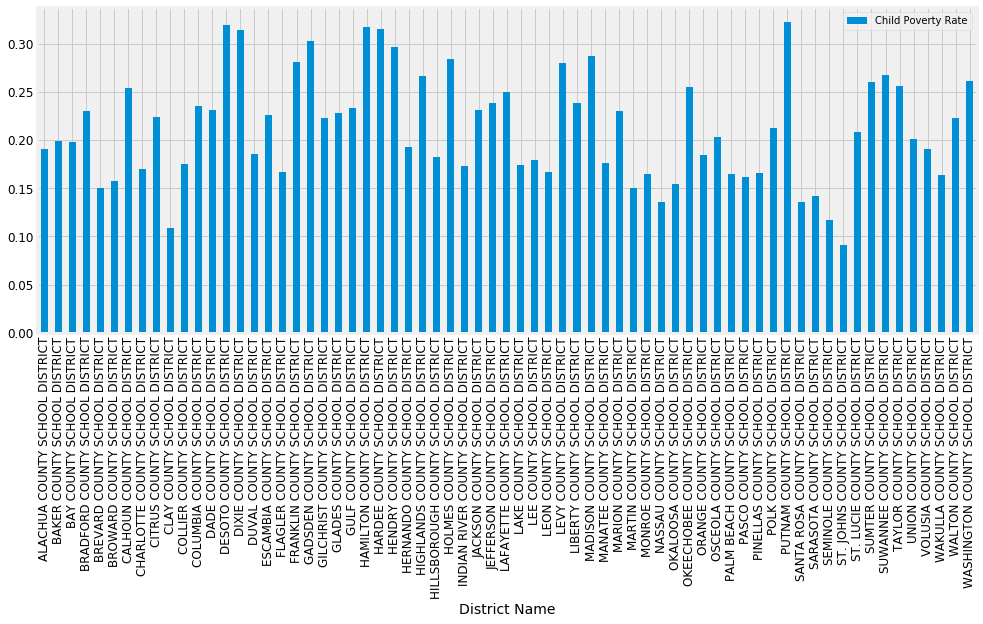

In [46]:
#Bar plot of average juvenile placement rate by state
avg_poverty[['Child Poverty Rate']].plot(figsize=(15, 6),kind='bar')
plt.show()

In [60]:
avg_poverty.reset_index(inplace=True)

#The 5 districs with the largest child poverty rates
top_5_districts = list(avg_poverty.sort_values(by='Child Poverty Rate',ascending=False)['District Name'].head(5))

In [61]:
top_5_districts

['PUTNAM COUNTY SCHOOL DISTRICT',
 'DESOTO COUNTY SCHOOL DISTRICT',
 'HAMILTON COUNTY SCHOOL DISTRICT',
 'HARDEE COUNTY SCHOOL DISTRICT',
 'DIXIE COUNTY SCHOOL DISTRICT']

In [47]:
#pivot
poverty_pivot= FL_child_poverty.pivot(index='Year',columns='District Name',values='Child Poverty Rate')
poverty_pivot.head()

District Name  ALACHUA COUNTY SCHOOL DISTRICT  BAKER COUNTY SCHOOL DISTRICT  \
Year                                                                          
1999                                 0.184611                      0.212420   
2000                                 0.147454                      0.166847   
2001                                 0.157957                      0.166923   
2002                                 0.158609                      0.151732   
2003                                 0.181201                      0.188403   

District Name  BAY COUNTY SCHOOL DISTRICT  BRADFORD COUNTY SCHOOL DISTRICT  \
Year                                                                         
1999                             0.184825                         0.214669   
2000                             0.168916                         0.185211   
2001                             0.176590                         0.196390   
2002                             0.169722                         0.184204   
2003                             0.185127                         0.206000   

District Name  BREVARD COUNTY SCHOOL DISTRICT  BROWARD COUNTY SCHOOL DISTRICT  \
Year                                                                            
1999                                 0.123537                        0.140403   
2000                                 0.116633                        0.131191   
2001                                 0.122656                        0.143149   
2002                                 0.115460                        0.139501   
2003                                 0.126428                        0.160727   

District Name  CALHOUN COUNTY SCHOOL DISTRICT  \
Year                                            
1999                                 0.246229   
2000                                 0.228493   
2001                                 0.237762   
2002                                 0.217209   
2003                                 0.230698   

District Name  CHARLOTTE COUNTY SCHOOL DISTRICT  \
Year                                              
1999                                   0.139794   
2000                                   0.139524   
2001                                   0.146534   
2002                                   0.136813   
2003                                   0.141557   

District Name  CITRUS COUNTY SCHOOL DISTRICT  CLAY COUNTY SCHOOL DISTRICT  \
Year                                                                        
1999                                0.189269                     0.097626   
2000                                0.181067                     0.090599   
2001                                0.192131                     0.095185   
2002                                0.185440                     0.078420   
2003                                0.190061                     0.090559   

District Name                ...                  \
Year                         ...                   
1999                         ...                   
2000                         ...                   
2001                         ...                   
2002                         ...                   
2003                         ...                   

District Name  ST. JOHNS COUNTY SCHOOL DISTRICT  \
Year                                              
1999                                   0.105630   
2000                                   0.088797   
2001                                   0.088631   
2002                                   0.079238   
2003                                   0.098168   

District Name  ST. LUCIE COUNTY SCHOOL DISTRICT  \
Year                                              
1999                                   0.198124   
2000                                   0.175924   
2001                                   0.183053   
2002                                   0.167651   
2003                                   0.185528   

District

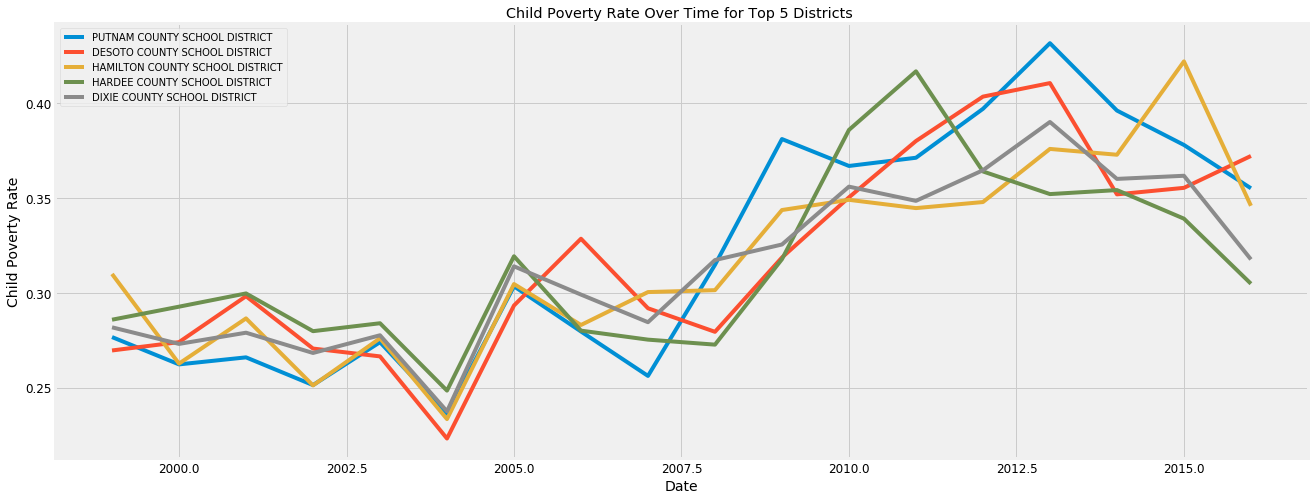

In [64]:
#Plot for top 5 districts

plt.figure(figsize=(20, 8))
for d in top_5_districts:
    plt.plot(poverty_pivot.index, poverty_pivot[d], label = d)

plt.xlabel('Date')
plt.ylabel('Child Poverty Rate')
plt.title('Child Poverty Rate Over Time for Top 5 Districts ')
plt.legend()


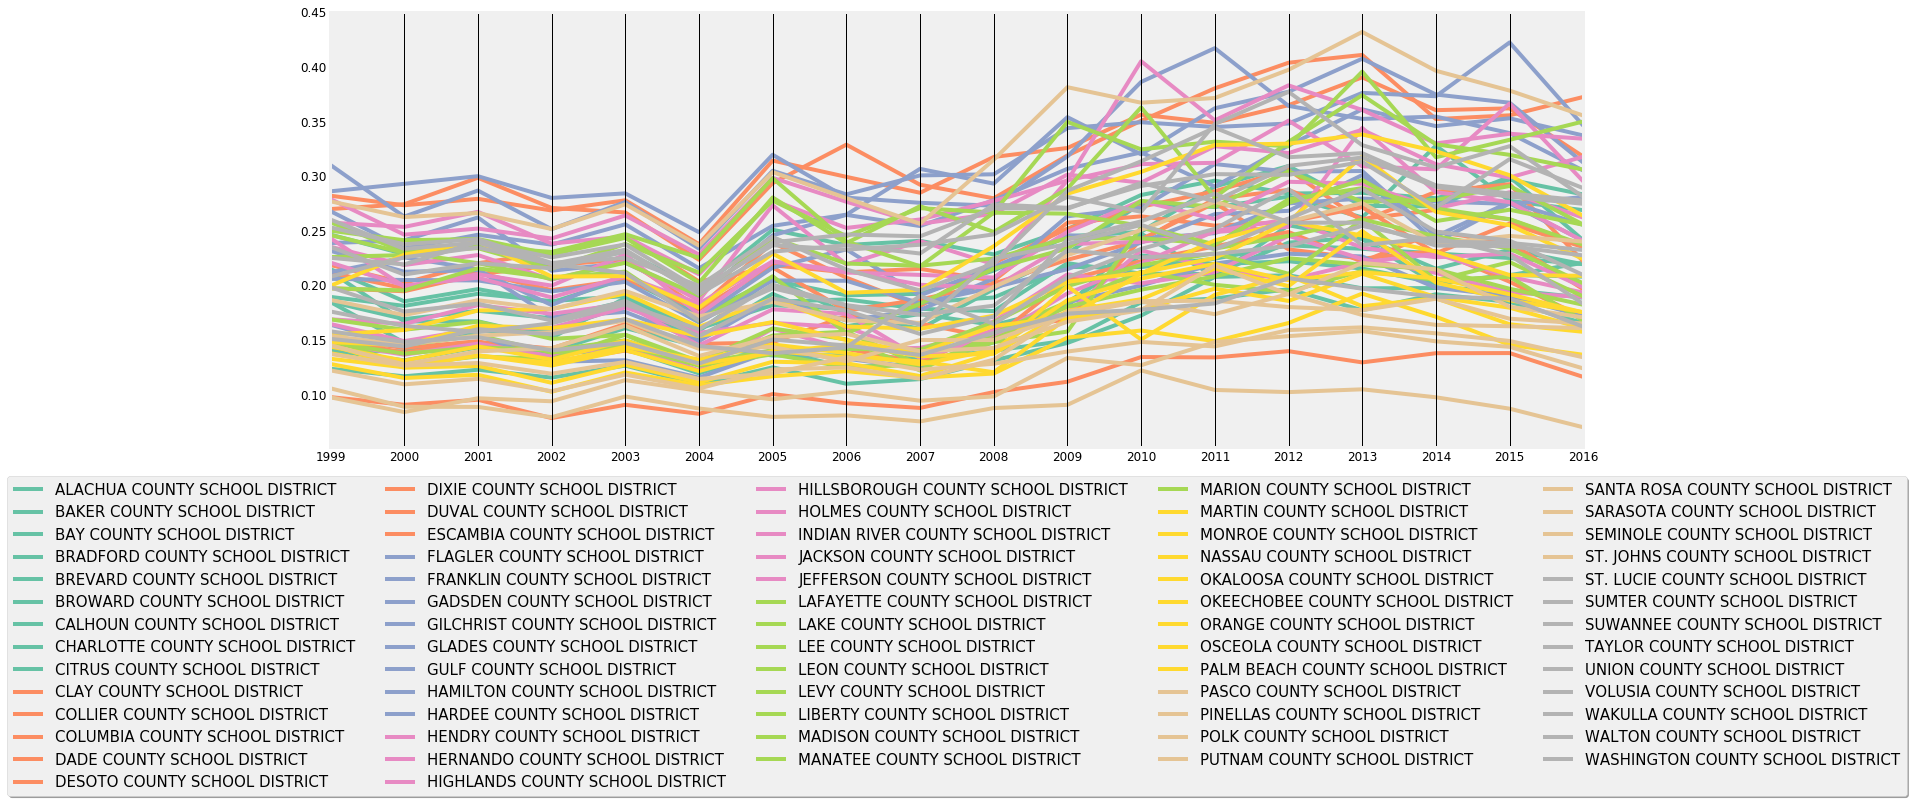

In [65]:
#pivot
poverty_pivot1= FL_child_poverty.pivot(index='District Name',columns='Year',values='Child Poverty Rate').reset_index()

# Make the parallel coordinates plot
plt.figure(figsize=(20, 8))
parallel_coordinates(poverty_pivot1, 'District Name', colormap=plt.get_cmap("Set2"))

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5,prop={'size': 15})

plt.show()

# How much does child poverty rate contribute to school funding?
***

In [70]:
#Get intersecting years present in both datasets
poverty_years = list(FL_child_poverty['Year'].unique())
funding_years = list(std_districts_FL['YRDATA'].unique())
#intersection of both lists
years = list(set(poverty_years) & set(funding_years))

In [71]:
years

[2016,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [72]:
#Filter out datasets where Year/YRDATA is in the years list

poverty_filt = FL_child_poverty.copy()
poverty_filt = poverty_filt[poverty_filt['Year'].isin(years)]
funding_filt = std_districts_FL.copy()
funding_filt = funding_filt[funding_filt['YRDATA'].isin(years)]

In [74]:
funding_with_poverty = pd.merge(funding_filt,poverty_filt, left_on=['NAME','YRDATA'],right_on=['District Name','Year'],how='inner')


In [75]:
funding_with_poverty.head()

NAME  YRDATA   TOTALREV   TFEDREV    TSTREV  \
0   ALACHUA COUNTY SCHOOL DISTRICT    2016   9.702167  1.270125  4.333970   
1     BAKER COUNTY SCHOOL DISTRICT    2016   8.530388  0.965414  6.065374   
2       BAY COUNTY SCHOOL DISTRICT    2016   9.979338  0.934416  3.981534   
3  BRADFORD COUNTY SCHOOL DISTRICT    2016  10.011229  1.574860  5.697130   
4   BREVARD COUNTY SCHOOL DISTRICT    2016   9.968929  1.037302  4.560299   

    TLOCREV  TOTALEXP  TCURINST  TCURSSVC  TCURONON         ...          \
0  4.098072  9.340386  4.968435  3.352738  0.626344         ...           
1  1.499600  8.362055  4.367453  3.266693  0.565974         ...           
2  5.063389  9.527591  5.411936  2.667003  0.541305         ...           
3  2.739239  9.352776  5.072052  3.243606  0.945415         ...           
4  4.371328  9.390130  5.292529  2.829184  0.455725         ...           

   FIPS State Code  CCD District ID                    District Name  \
0               12               30   ALACHUA COUNTY SCHOOL DISTRICT   
1               12               60     BAKER COUNTY SCHOOL DISTRICT   
2               12               90       BAY COUNTY SCHOOL DISTRICT   
3               12              120  BRADFORD COUNTY SCHOOL DISTRICT   
4               12              150   BREVARD COUNTY SCHOOL DISTRICT   

  Total Population  Population of Children 5 to 17 years of Age  \
0           263496                                        33377   
1            27937                                         5124   
2           183974                                        28010   
3            26926                                         3879   
4           579130                                        79542   

   Estimated Number of Children in Poverty    File Name Created Date  Year  \
0                                     7359  sd16-fl.txt    02NOV2017  2016   
1                                     1124  sd16-fl.txt    02NOV2017  2016   
2                                     6136  sd16-fl.txt    02NOV2017  2016   
3                                      935  sd16-fl.txt    02NOV2017  2016   
4                                    14998  sd16-fl.txt    02NOV2017  2016   

   Child Poverty Rate  
0            0.220481  
1            0.219360  
2            0.219065  
3            0.241042  
4            0.188554  

[5 rows x 21 columns]

In [76]:
funding_with_poverty.isna().sum()

NAME                                           0
YRDATA                                         0
TOTALREV                                       0
TFEDREV                                        0
TSTREV                                         0
TLOCREV                                        0
TOTALEXP                                       0
TCURINST                                       0
TCURSSVC                                       0
TCURONON                                       0
TCAPOUT                                        0
FIPS State Code                                0
CCD District ID                                0
District Name                                  0
Total Population                               0
Population of Children 5 to 17 years of Age    0
Estimated Number of Children in Poverty        0
File Name                                      0
Created Date                                   0
Year                                           0
Child Poverty Rate  

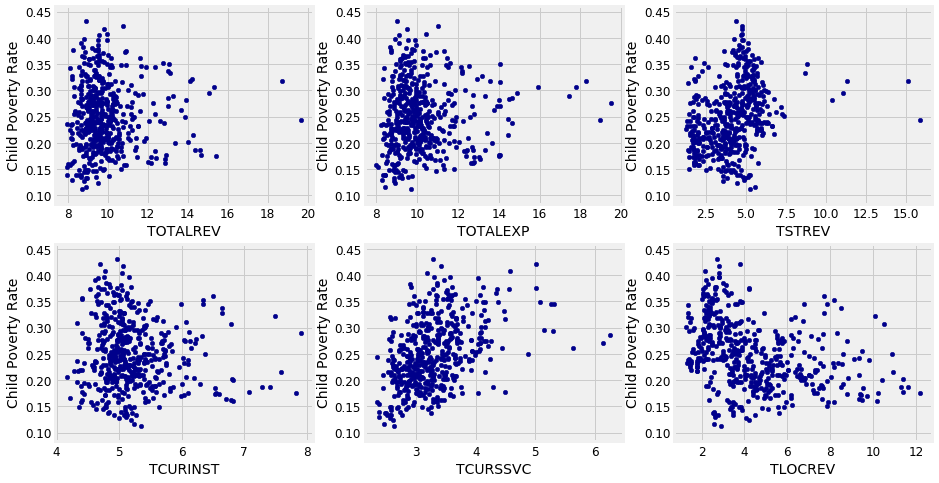

In [82]:
#Scatter plots of different features vs placement rate
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for i,var in enumerate(['TOTALREV','TOTALEXP','TSTREV','TCURINST',
                        'TCURSSVC','TLOCREV']):
    if i in [0,1,2]:
        funding_with_poverty.plot.scatter(x=var,y='Child Poverty Rate',c='DarkBlue', ax=axes[0][i])
    else:
        funding_with_poverty.plot.scatter(x=var,y='Child Poverty Rate',c='DarkBlue', ax=axes[1][i-3])
# axes[0][0].set_ylabel('Child Poverty Rate')
# axes[1][0].set_ylabel('Child Poverty Rate')

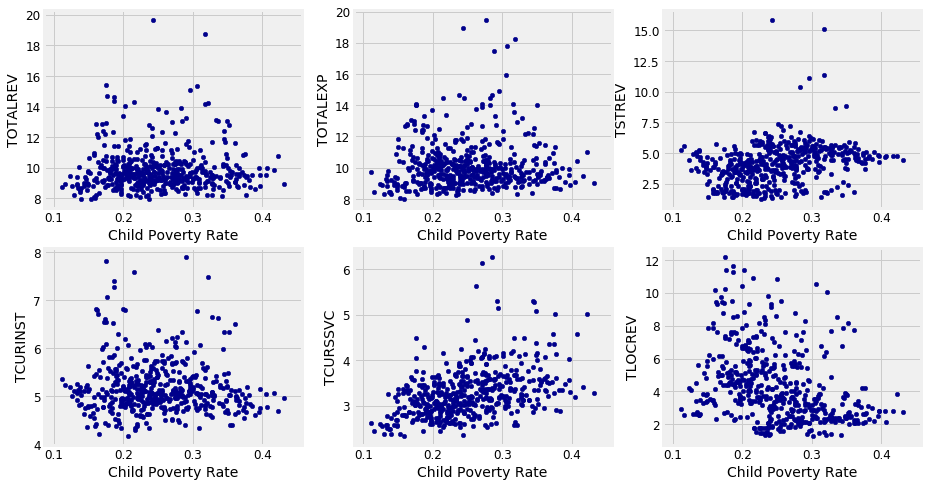

In [81]:
#Scatter plots of different features vs placement rate
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
for i,var in enumerate(['TOTALREV','TOTALEXP','TSTREV','TCURINST',
                        'TCURSSVC','TLOCREV']):
    if i in [0,1,2]:
        funding_with_poverty.plot.scatter(x='Child Poverty Rate',y=var,c='DarkBlue', ax=axes[0][i])
    else:
        funding_with_poverty.plot.scatter(x='Child Poverty Rate',y=var,c='DarkBlue', ax=axes[1][i-3])
# axes[0][0].set_ylabel('Child Poverty Rate')
# axes[1][0].set_ylabel('Child Poverty Rate')

In [ ]:
#Function to plot fitted line on top of scatter plot

def plot_fitted_line(X,y,predictions):

    plt.scatter(X,y)
    plt.plot(X, predictions)
    return plt.show()

In [ ]:
#OLS linear model with a transformation

cols_model = ['INSTRUCTION_EXPENDITURE']

X = funding_with_placement[cols_model]
# X_const = sm.add_constant(X)

y = np.sqrt(funding_with_placement["Data"]) #juvenile placement rate

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

In [ ]:
##Robust linear model with a constant

cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]

X_const = sm.add_constant(X)

y = funding_with_placement["Data"] #juvenile placement rate

# Note the difference in argument order
model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
predictions = model.predict(X_const) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

In [ ]:
##Robust linear model using a exponential transformation

cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]

X_const = sm.add_constant(X)

y = np.log(funding_with_placement["Data"]) #juvenile placement rate

# Note the difference in argument order
model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
predictions = model.predict(X_const) # make the predictions by the model

# Print out the statistics
model.summary()


In [ ]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

In [ ]:
#Residual plot
plt.scatter(model.model.exog[:,0], model.resid)
plt.show()

In [ ]:
#Scatter plots of different features vs placement rate
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['TOTAL_REVENUE','TOTAL_EXPENDITURE','STATE_REVENUE']):
    funding_with_placement.plot.scatter(x=var,y='Data',c='DarkBlue', ax=axes[i], title=var)
axes[0].set_ylabel('Placement Rate')

In [ ]:
#Function to plot fitted line on top of scatter plot

def plot_fitted_line(X,y,predictions):
    # scatter-plot data
#     ax = df.plot(x=x, y=y, kind='scatter')
# # plot regression line on the same axes, set x-axis limit

    plt.scatter(X,y)
    plt.plot(X, predictions)
    return plt.show()

In [ ]:
##Robust linear model with a constant

cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]

X_const = sm.add_constant(X)

y = funding_with_placement["Data"] #juvenile placement rate

# Note the difference in argument order
model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
predictions = model.predict(X_const) # make the predictions by the model

# Print out the statistics
model.summary()


In [ ]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

In [ ]:
#Residual plot
plt.scatter(model.model.exog[:,0], model.resid)
plt.show()

In [ ]:
#3D plot of inputs vs output

# create matplotlib 3d axes

%matplotlib notebook
fig = plt.figure(figsize=(8, 5))
ax = Axes3D(fig, azim=-115, elev=15)

# plot data points

ax.scatter(funding_placement_naep.Reading, funding_placement_naep.Mathematics, funding_placement_naep['TOTAL_REVENUE'], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Revenue')


In [ ]:
## Create the 3d plot
# grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Reading.min(), X.Reading.max(), 100), 
                       np.linspace(X.Mathematics.min(), X.Mathematics.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] * xx1 + model.params[1] * xx2

# create matplotlib 3d axes
%matplotlib notebook
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - predictions
ax.scatter(X[resid >= 0].Reading, X[resid >= 0].Mathematics, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Reading, X[resid < 0].Mathematics, y[resid < 0], color='black', alpha=1.0)

# set axis labels

ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Revenue')

In [5]:
#Have both data set with the same range of years: 1998-2016
FL_child_poverty = FL_juv_crime_rate.loc[FL_juv_crime_rate['Year'] != 2017]


In [6]:
#Pull out county names from the school districts
std_districts_FL['COUNTY NAME'] = std_districts_FL.NAME.str.title().str.split().str[0]


In [7]:
#This loop deals with the few exceptions that weren't covered in the previous command

for i, row in std_districts_FL.iterrows():
    for x in ["ST JOHNS", "ST LUCIE", "SANTA ROSA", "DE SOTO", "INDIAN RIVER"]:
        if x in std_districts_FL['NAME'][i]:
            std_districts_FL.at[i,'COUNTY NAME'] = x   
        

In [8]:
std_districts_FL.rename(columns={'YRDATA': 'Year'}, inplace=True)
juv_crime_vs_finances = std_districts_FL.merge(FL_juv_crime_rate, on=["COUNTY NAME","Year"], how = 'inner')

list(juv_crime_vs_finances)

['NAME',
 'Year',
 'TOTALREV',
 'TFEDREV',
 'TSTREV',
 'TLOCREV',
 'TOTALEXP',
 'TCURINST',
 'TCURSSVC',
 'TCURONON',
 'TCAPOUT',
 'COUNTY NAME',
 'TOTAL ARRESTS',
 'JUVENILE POP',
 'CRIME RATE']

In [9]:
cols = ['COUNTY NAME',
     'Year',
     'TOTALREV',
     'TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TOTALEXP',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
     'TOTAL ARRESTS',
     'JUVENILE POP',
     'CRIME RATE']

juv_crime_vs_finances = juv_crime_vs_finances[cols]

In [10]:
juv_crime_vs_finances.head()

COUNTY NAME  Year   TOTALREV   TFEDREV    TSTREV   TLOCREV  TOTALEXP  \
0     Alachua  2016   9.702167  1.270125  4.333970  4.098072  9.340386   
1       Baker  2016   8.530388  0.965414  6.065374  1.499600  8.362055   
2         Bay  2016   9.979338  0.934416  3.981534  5.063389  9.527591   
3    Bradford  2016  10.011229  1.574860  5.697130  2.739239  9.352776   
4     Brevard  2016   9.968929  1.037302  4.560299  4.371328  9.390130   

   TCURINST  TCURSSVC  TCURONON   TCAPOUT  TOTAL ARRESTS  JUVENILE POP  \
0  4.968435  3.352738  0.626344  0.328715            730         47667   
1  4.367453  3.266693  0.565974  0.145542             77          6877   
2  5.411936  2.667003  0.541305  0.797883           1234         39597   
3  5.072052  3.243606  0.945415  0.083593             60          5393   
4  5.292529  2.829184  0.455725  0.526518           2250        107226   

   CRIME RATE  
0    1.531458  
1    1.119674  
2    3.116398  
3    1.112553  
4    2.098372

In [11]:
juv_crime_vs_finances.to_csv(r"..\Data\Florida data\Merged_Datasets\juvenile_crime_vs_finances.csv")

In [19]:
#Linear model without a constant

cols_model = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT']

X = juv_crime_vs_finances[cols_model]
y = juv_crime_vs_finances["CRIME RATE"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CRIME RATE   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     404.5
Date:                Sun, 18 Nov 2018   Prob (F-statistic):          1.22e-302
Time:                        15:57:06   Log-Likelihood:                -2124.1
No. Observations:                1138   AIC:                             4262.
Df Residuals:                    1131   BIC:                             4297.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TFEDREV       -0.9032      0.152     -5.956      0.000      -1.201      -0.606
TSTREV         0.3845      0.055      6.985      0.000       0.277       0.493
TLOCREV        0.3906      0.056      6.996      0.000       0.281       0.500
TCURINST       0.0342      0.091      0.377      0.706      -0.144       0.212
TCURSSVC       0.1818      0.134      1.359      0.174      -0.081       0.444
TCURONON      -0.3294      0.261     -1.264      0.206      -0.841       0.182
TCAPOUT       -0.1570      0.047     -3.326      0.001      -0.250      -0.064
==============================================================================
Omnibus:                      332.188   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1915.609
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                       8.870   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:


X = juv_crime_vs_finances['TOTALEXP']

y = juv_crime_vs_finances["CRIME RATE"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CRIME RATE   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2245.
Date:                Sun, 18 Nov 2018   Prob (F-statistic):          2.00e-271
Time:                        15:58:17   Log-Likelihood:                -2217.2
No. Observations:                1138   AIC:                             4436.
Df Residuals:                    1137   BIC:                             4441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TOTALEXP       0.2515      0.005     47.385      0.000       0.241       0.262
==============================================================================
Omnibus:                      313.811   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.673
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       8.593   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""